In [1]:

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# collecting the data

In [3]:
import pandas_datareader as pdr

In [4]:
key = '5ffcd3105ca47e8a80025a1b01f36ea41546c8c7'

In [111]:
df = pdr.get_data_tiingo('ADNWW' , api_key = key)

In [112]:
df.to_csv('12.csv')

In [113]:
import pandas as pd

In [114]:
df = pd.read_csv('12.csv')

In [115]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,ADNWW,2019-01-24 00:00:00+00:00,0.35,0.35,0.35,0.35,10000,0.35,0.35,0.35,0.35,10000,0.0,1.0
1,ADNWW,2019-01-28 00:00:00+00:00,0.35,0.35,0.35,0.35,5000,0.35,0.35,0.35,0.35,5000,0.0,1.0
2,ADNWW,2019-01-29 00:00:00+00:00,0.32,0.32,0.32,0.32,5000,0.32,0.32,0.32,0.32,5000,0.0,1.0
3,ADNWW,2019-02-01 00:00:00+00:00,0.33,0.33,0.33,0.33,45100,0.33,0.33,0.33,0.33,45100,0.0,1.0
4,ADNWW,2019-02-04 00:00:00+00:00,0.32,0.32,0.32,0.32,5000,0.32,0.32,0.32,0.32,5000,0.0,1.0


In [116]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
393,ADNWW,2021-04-23 00:00:00+00:00,1.70,1.90,1.6900,1.80,413890,1.70,1.90,1.6900,1.80,413890,0.0,1.0
394,ADNWW,2021-04-26 00:00:00+00:00,1.82,1.85,1.6000,1.74,281508,1.82,1.85,1.6000,1.74,281508,0.0,1.0
395,ADNWW,2021-04-27 00:00:00+00:00,1.79,1.89,1.7450,1.76,173131,1.79,1.89,1.7450,1.76,173131,0.0,1.0
396,ADNWW,2021-04-28 00:00:00+00:00,1.82,1.93,1.7000,1.75,229879,1.82,1.93,1.7000,1.75,229879,0.0,1.0
397,ADNWW,2021-04-29 00:00:00+00:00,1.88,1.93,1.7305,1.91,126268,1.88,1.93,1.7305,1.91,126268,0.0,1.0


In [117]:
df.shape

(398, 14)

In [118]:
#df1= df.reset_index()['close']

In [119]:
df1= df['close']

In [120]:
df1

0      0.35
1      0.35
2      0.32
3      0.33
4      0.32
       ... 
393    1.70
394    1.82
395    1.79
396    1.82
397    1.88
Name: close, Length: 398, dtype: float64

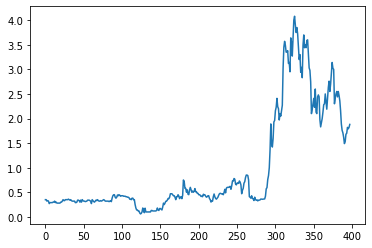

In [121]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [122]:
df1.shape

(398,)

In [123]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [124]:
df1

array([[0.0721393 ],
       [0.0721393 ],
       [0.06467662],
       [0.06716418],
       [0.06467662],
       [0.05223881],
       [0.05721393],
       [0.05721393],
       [0.05721393],
       [0.05721393],
       [0.05970149],
       [0.05970149],
       [0.06467662],
       [0.05721393],
       [0.05970149],
       [0.05472637],
       [0.05472637],
       [0.05472637],
       [0.05472637],
       [0.05472637],
       [0.05972637],
       [0.05970149],
       [0.06467662],
       [0.0721393 ],
       [0.06716418],
       [0.06716418],
       [0.0721393 ],
       [0.0721393 ],
       [0.0721393 ],
       [0.0721393 ],
       [0.07462687],
       [0.0721393 ],
       [0.06965174],
       [0.0721393 ],
       [0.06716418],
       [0.06467662],
       [0.06467662],
       [0.06467662],
       [0.06467662],
       [0.05721393],
       [0.05721393],
       [0.05970149],
       [0.06965174],
       [0.06965174],
       [0.06716418],
       [0.05970149],
       [0.06965174],
       [0.059

In [125]:
df1.shape

(398, 1)

In [126]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data , test_data = df1[0:training_size , :],df1[training_size : len(df1) , :1]

In [127]:
train_data.shape

(258, 1)

In [128]:
test_data.shape

(140, 1)

In [129]:
t = df1[training_size : len(df1) , :]

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [131]:
t.shape

(140, 1)

In [132]:
import numpy 
def create_dataset(dataset , time_stemp = 1):
    dataX , dataY = [] , []
    for i in range(len(dataset)- time_stemp-1):
        a = dataset[i:(i+time_stemp) , 0]
        dataX.append(a)
        dataY.append(dataset[i + time_stemp , 0])
    return numpy.array(dataX) , numpy.array(dataY)

In [133]:
len(train_data)

258

In [134]:
time_stemp = 100
X_train , Y_train = create_dataset(train_data , time_stemp)
X_test , Y_test = create_dataset(test_data , time_stemp)

In [135]:
X_train.shape , Y_train.shape 

((157, 100), (157,))

In [136]:
X_test.shape , Y_test.shape

((39, 100), (39,))

In [137]:
#reshape input into samples , timestemp , features  which is required in LSTM
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [138]:
model = Sequential()
model.add(LSTM(50 ,return_sequences = True , input_shape = (100 ,1 ) ))
model.add(LSTM(50 ,return_sequences = True ))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam' )



In [139]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.fit(X_train , Y_train , validation_data = (X_test , Y_test) , epochs = 100 , batch_size = 128 , verbose = 1)

Epoch 1/100
2/2 [==============================] - 15s 3s/step - loss: 0.0093 - val_loss: 0.2003
Epoch 2/100
2/2 [==============================] - 1s 414ms/step - loss: 0.0030 - val_loss: 0.0841
Epoch 3/100
2/2 [==============================] - 1s 404ms/step - loss: 0.0019 - val_loss: 0.0543
Epoch 4/100
2/2 [==============================] - 1s 399ms/step - loss: 0.0026 - val_loss: 0.0793
Epoch 5/100
2/2 [==============================] - 1s 437ms/step - loss: 0.0015 - val_loss: 0.1097
Epoch 6/100
2/2 [==============================] - 1s 379ms/step - loss: 0.0015 - val_loss: 0.1234
Epoch 7/100
2/2 [==============================] - 1s 395ms/step - loss: 0.0018 - val_loss: 0.1193
Epoch 8/100
2/2 [==============================] - 1s 414ms/step - loss: 0.0017 - val_loss: 0.1057
Epoch 9/100
2/2 [==============================] - 1s 396ms/step - loss: 0.0013 - val_loss: 0.0869
Epoch 10/100
2/2 [==============================] - 1s 405ms/step - loss: 0.0012 - val_loss: 0.0674
Epoch 11/10

2/2 [==============================] - 0s 212ms/step - loss: 3.9070e-04 - val_loss: 0.0169
Epoch 81/100
2/2 [==============================] - 0s 200ms/step - loss: 4.0043e-04 - val_loss: 0.0178
Epoch 82/100
2/2 [==============================] - 0s 209ms/step - loss: 3.6956e-04 - val_loss: 0.0232
Epoch 83/100
2/2 [==============================] - 0s 207ms/step - loss: 4.1536e-04 - val_loss: 0.0248
Epoch 84/100
2/2 [==============================] - 0s 201ms/step - loss: 4.2107e-04 - val_loss: 0.0218
Epoch 85/100
2/2 [==============================] - 0s 232ms/step - loss: 3.6854e-04 - val_loss: 0.0211
Epoch 86/100
2/2 [==============================] - 0s 221ms/step - loss: 3.8089e-04 - val_loss: 0.0203
Epoch 87/100
2/2 [==============================] - 1s 221ms/step - loss: 3.8258e-04 - val_loss: 0.0207
Epoch 88/100
2/2 [==============================] - 0s 206ms/step - loss: 3.6342e-04 - val_loss: 0.0217
Epoch 89/100
2/2 [==============================] - 0s 206ms/step - loss: 3.7

In [141]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [142]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [143]:
import math

In [144]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train ,train_predict ))

0.33137492948145686

In [145]:
math.sqrt(mean_squared_error(Y_test ,test_predict ))

1.2749873120330644

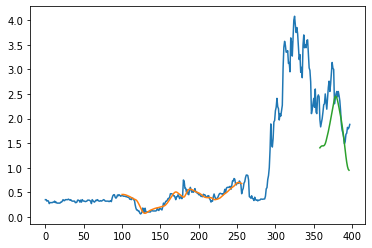

In [146]:
loop_back = 100 
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loop_back:len(train_predict)+loop_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [147]:
trainPredictPlot[loop_back:len(train_predict)+loop_back, :] = train_predict

In [148]:
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :] = test_predict

In [149]:
testPredictPlot[len(train_predict)+(loop_back*2)+1 :len(df1)-1 , :]

array([[1.40417302],
       [1.42418838],
       [1.43855035],
       [1.44385493],
       [1.44359553],
       [1.44562805],
       [1.45921087],
       [1.48787773],
       [1.53763306],
       [1.60161865],
       [1.66740263],
       [1.73505044],
       [1.8092283 ],
       [1.89307606],
       [1.97648871],
       [2.05735517],
       [2.13909268],
       [2.22763062],
       [2.31682539],
       [2.39969325],
       [2.44688225],
       [2.4530437 ],
       [2.42400241],
       [2.36984897],
       [2.29654408],
       [2.21561766],
       [2.13275743],
       [2.04950476],
       [1.96223831],
       [1.86339867],
       [1.75009775],
       [1.62519491],
       [1.49290061],
       [1.35652804],
       [1.22462142],
       [1.11043274],
       [1.02246308],
       [0.96851069],
       [0.94862378]])

In [150]:
test_predict

array([[1.404173 ],
       [1.4241884],
       [1.4385504],
       [1.4438549],
       [1.4435955],
       [1.445628 ],
       [1.4592109],
       [1.4878777],
       [1.5376331],
       [1.6016186],
       [1.6674026],
       [1.7350504],
       [1.8092283],
       [1.8930761],
       [1.9764887],
       [2.0573552],
       [2.1390927],
       [2.2276306],
       [2.3168254],
       [2.3996933],
       [2.4468822],
       [2.4530437],
       [2.4240024],
       [2.369849 ],
       [2.296544 ],
       [2.2156177],
       [2.1327574],
       [2.0495048],
       [1.9622383],
       [1.8633987],
       [1.7500978],
       [1.6251949],
       [1.4929006],
       [1.356528 ],
       [1.2246214],
       [1.1104327],
       [1.0224631],
       [0.9685107],
       [0.9486238]], dtype=float32)

In [151]:
len(test_data)

140

In [154]:
x_input = test_data[40:].reshape(1,-1)
x_input.shape

(1, 100)

In [155]:
temp_input = list(x_input)


In [156]:
temp_input = temp_input[0].tolist()

In [157]:
temp_input

[0.46517412935323377,
 0.47263681592039797,
 0.5223880597014925,
 0.5396019900497512,
 0.5846019900497511,
 0.5422885572139303,
 0.5323383084577114,
 0.4751243781094527,
 0.5074626865671641,
 0.4950248756218905,
 0.5223880597014925,
 0.5497512437810944,
 0.7363184079601989,
 0.8432835820895521,
 0.8731343283582088,
 0.8532338308457711,
 0.8184079601990049,
 0.8184079601990049,
 0.8258706467661691,
 0.7611940298507461,
 0.7661691542288557,
 0.7189303482587064,
 0.890547263681592,
 0.8681592039800994,
 0.798507462686567,
 0.8955223880597014,
 0.9800995024875621,
 0.9999999999999998,
 0.9552238805970148,
 0.9179104477611939,
 0.9427860696517412,
 0.9104477611940298,
 0.8432835820895521,
 0.781094527363184,
 0.8059701492537312,
 0.716417910447761,
 0.7412935323383083,
 0.6890547263681591,
 0.8532338308457711,
 0.9054726368159203,
 0.8407960199004973,
 0.8557213930348258,
 0.8407960199004973,
 0.8775373134328357,
 0.880597014925373,
 0.8059950248756218,
 0.7388059701492535,
 0.7263681592039

In [158]:
len(temp_input)

100

In [159]:
from numpy import array

In [160]:
lst_output = []
n_steps = 100 
i = 0 
while(i<30):
    
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("day input".format(i , x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1 , n_steps , 1))
        print(x_input)
        yhat = model.predict(x_input , verbose = 0)
        print("day output".format(i , yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i= i+1
    else:
        x_input = x_input.reshape((1, n_steps , 1))
        print(x_input.shape)
        yhat = model.predict(x_input , verbose =0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i= i+1
        
print(lst_output)
        

(1, 100, 1)
[0.23385382]
101
day input
[[[0.47263682]
  [0.52238806]
  [0.53960199]
  [0.58460199]
  [0.54228856]
  [0.53233831]
  [0.47512438]
  [0.50746269]
  [0.49502488]
  [0.52238806]
  [0.54975124]
  [0.73631841]
  [0.84328358]
  [0.87313433]
  [0.85323383]
  [0.81840796]
  [0.81840796]
  [0.82587065]
  [0.76119403]
  [0.76616915]
  [0.71893035]
  [0.89054726]
  [0.8681592 ]
  [0.79850746]
  [0.89552239]
  [0.9800995 ]
  [1.        ]
  [0.95522388]
  [0.91791045]
  [0.94278607]
  [0.91044776]
  [0.84328358]
  [0.78109453]
  [0.80597015]
  [0.71641791]
  [0.74129353]
  [0.68905473]
  [0.85323383]
  [0.90547264]
  [0.84079602]
  [0.85572139]
  [0.84079602]
  [0.87753731]
  [0.88059701]
  [0.80599502]
  [0.73880597]
  [0.72636816]
  [0.6679602 ]
  [0.50746269]
  [0.52985075]
  [0.55721393]
  [0.58457711]
  [0.539801  ]
  [0.63181592]
  [0.51492537]
  [0.50746269]
  [0.5920398 ]
  [0.60199005]
  [0.5920398 ]
  [0.47761194]
  [0.44029851]
  [0.460199  ]
  [0.48258706]
  [0.51492537]
 

day output
day input
[[[0.49502488]
  [0.52238806]
  [0.54975124]
  [0.73631841]
  [0.84328358]
  [0.87313433]
  [0.85323383]
  [0.81840796]
  [0.81840796]
  [0.82587065]
  [0.76119403]
  [0.76616915]
  [0.71893035]
  [0.89054726]
  [0.8681592 ]
  [0.79850746]
  [0.89552239]
  [0.9800995 ]
  [1.        ]
  [0.95522388]
  [0.91791045]
  [0.94278607]
  [0.91044776]
  [0.84328358]
  [0.78109453]
  [0.80597015]
  [0.71641791]
  [0.74129353]
  [0.68905473]
  [0.85323383]
  [0.90547264]
  [0.84079602]
  [0.85572139]
  [0.84079602]
  [0.87753731]
  [0.88059701]
  [0.80599502]
  [0.73880597]
  [0.72636816]
  [0.6679602 ]
  [0.50746269]
  [0.52985075]
  [0.55721393]
  [0.58457711]
  [0.539801  ]
  [0.63181592]
  [0.51492537]
  [0.50746269]
  [0.5920398 ]
  [0.60199005]
  [0.5920398 ]
  [0.47761194]
  [0.44029851]
  [0.460199  ]
  [0.48258706]
  [0.51492537]
  [0.55223881]
  [0.55721393]
  [0.60696517]
  [0.56965174]
  [0.52982587]
  [0.58706468]
  [0.63930348]
  [0.67164179]
  [0.61940299]
  [0

day output
day input
[[[0.81840796]
  [0.82587065]
  [0.76119403]
  [0.76616915]
  [0.71893035]
  [0.89054726]
  [0.8681592 ]
  [0.79850746]
  [0.89552239]
  [0.9800995 ]
  [1.        ]
  [0.95522388]
  [0.91791045]
  [0.94278607]
  [0.91044776]
  [0.84328358]
  [0.78109453]
  [0.80597015]
  [0.71641791]
  [0.74129353]
  [0.68905473]
  [0.85323383]
  [0.90547264]
  [0.84079602]
  [0.85572139]
  [0.84079602]
  [0.87753731]
  [0.88059701]
  [0.80599502]
  [0.73880597]
  [0.72636816]
  [0.6679602 ]
  [0.50746269]
  [0.52985075]
  [0.55721393]
  [0.58457711]
  [0.539801  ]
  [0.63181592]
  [0.51492537]
  [0.50746269]
  [0.5920398 ]
  [0.60199005]
  [0.5920398 ]
  [0.47761194]
  [0.44029851]
  [0.460199  ]
  [0.48258706]
  [0.51492537]
  [0.55223881]
  [0.55721393]
  [0.60696517]
  [0.56965174]
  [0.52982587]
  [0.58706468]
  [0.63930348]
  [0.67164179]
  [0.61940299]
  [0.65671642]
  [0.70895522]
  [0.76616915]
  [0.73631841]
  [0.73134328]
  [0.55721393]
  [0.58457711]
  [0.60696517]
  [0

day output
day input
[[[ 8.95522388e-01]
  [ 9.80099502e-01]
  [ 1.00000000e+00]
  [ 9.55223881e-01]
  [ 9.17910448e-01]
  [ 9.42786070e-01]
  [ 9.10447761e-01]
  [ 8.43283582e-01]
  [ 7.81094527e-01]
  [ 8.05970149e-01]
  [ 7.16417910e-01]
  [ 7.41293532e-01]
  [ 6.89054726e-01]
  [ 8.53233831e-01]
  [ 9.05472637e-01]
  [ 8.40796020e-01]
  [ 8.55721393e-01]
  [ 8.40796020e-01]
  [ 8.77537313e-01]
  [ 8.80597015e-01]
  [ 8.05995025e-01]
  [ 7.38805970e-01]
  [ 7.26368159e-01]
  [ 6.67960199e-01]
  [ 5.07462687e-01]
  [ 5.29850746e-01]
  [ 5.57213930e-01]
  [ 5.84577114e-01]
  [ 5.39800995e-01]
  [ 6.31815920e-01]
  [ 5.14925373e-01]
  [ 5.07462687e-01]
  [ 5.92039801e-01]
  [ 6.01990050e-01]
  [ 5.92039801e-01]
  [ 4.77611940e-01]
  [ 4.40298507e-01]
  [ 4.60199005e-01]
  [ 4.82587065e-01]
  [ 5.14925373e-01]
  [ 5.52238806e-01]
  [ 5.57213930e-01]
  [ 6.06965174e-01]
  [ 5.69651741e-01]
  [ 5.29825871e-01]
  [ 5.87064677e-01]
  [ 6.39303483e-01]
  [ 6.71641791e-01]
  [ 6.19402985e-01]

In [161]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [162]:
 j=scaler.inverse_transform(lst_output)

In [163]:
j

array([[ 1.00009234e+00],
       [ 1.03177936e+00],
       [ 1.04074140e+00],
       [ 1.02412631e+00],
       [ 9.85327235e-01],
       [ 9.30194018e-01],
       [ 8.64758380e-01],
       [ 7.94110731e-01],
       [ 7.22034163e-01],
       [ 6.51060164e-01],
       [ 5.82720984e-01],
       [ 5.17839596e-01],
       [ 4.56790211e-01],
       [ 3.99694702e-01],
       [ 3.46553937e-01],
       [ 2.97324562e-01],
       [ 2.51956392e-01],
       [ 2.10405865e-01],
       [ 1.72634448e-01],
       [ 1.38603405e-01],
       [ 1.08266148e-01],
       [ 8.15631072e-02],
       [ 5.84183037e-02],
       [ 3.87382144e-02],
       [ 2.24126895e-02],
       [ 9.31658847e-03],
       [-6.88040648e-04],
       [-7.74921365e-03],
       [-1.20224304e-02],
       [-1.36686006e-02]])

In [109]:
df3 =df1.tolist()

In [110]:
df3.extend(lst_output)

In [66]:
len(df1)

1257

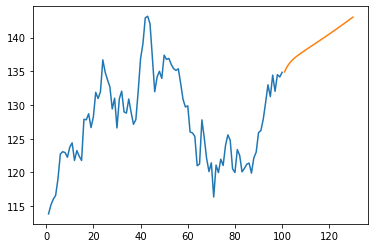

In [68]:
plt.plot(day_new , scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred , scaler.inverse_transform(lst_output))

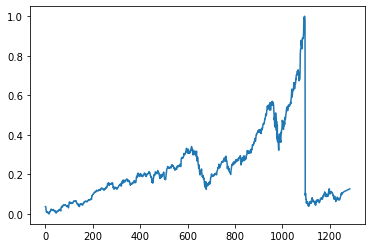

In [69]:
plt.plot(df3[1:])